In [644]:
# Import work
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

red_wine = (pd.read_csv('winequality-red.csv',  delimiter= ';'))
white_wine = pd.read_csv('winequality-white.csv', delimiter= ';')
all_wine = pd.concat([white_wine, red_wine], ignore_index=True)


In [645]:
for x in red_wine:
    print(x)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [646]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'Low'
if value <= 5 else 'Medium'
if value <= 7 else 'High')

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'Low'
if value <= 5 else 'Medium'
if value <= 7 else 'High')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['Low', 'Medium', 'High'])

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['Low', 'Medium', 'High'])

white_wine = white_wine.assign(wine_type='white')
red_wine = red_wine.assign(wine_type='red')

white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Medium,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Medium,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Medium,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium,white


In [647]:
rw = pd.DataFrame(red_wine)
ww = pd.DataFrame(white_wine)
aw = pd.DataFrame(all_wine)

ww.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Medium,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Medium,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Medium,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium,white


In [669]:
org = {}
for col in ww:
    new = col
    new = new.lower().replace(' ', '_')
    ww.rename(columns={col: new}, inplace=True)
    print(ww[col].dtype, col)
    if ww[col].dtype not in ['category', 'object']:
        org[new] = col.capitalize().replace('_', ' ')
print(org)

for col in rw:
    rw.rename(columns={col: col.lower().replace(' ', '_')}, inplace=True)

float64 fixed_acidity
float64 volatile_acidity
float64 citric_acid
float64 residual_sugar
float64 chlorides
float64 free_sulfur_dioxide
float64 total_sulfur_dioxide
float64 density
float64 ph
float64 sulphates
float64 alcohol
int64 quality
category quality_label
object wine_type
{'fixed_acidity': 'Fixed acidity', 'volatile_acidity': 'Volatile acidity', 'citric_acid': 'Citric acid', 'residual_sugar': 'Residual sugar', 'chlorides': 'Chlorides', 'free_sulfur_dioxide': 'Free sulfur dioxide', 'total_sulfur_dioxide': 'Total sulfur dioxide', 'density': 'Density', 'ph': 'Ph', 'sulphates': 'Sulphates', 'alcohol': 'Alcohol', 'quality': 'Quality'}


In [ ]:
pd.concat([ww.head(), ww.tail()])

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,white
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,medium,white


In [ ]:
round(pd.concat([rw.head(), rw.tail()]), 2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_label,wine_type
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.00,3.51,0.56,9.4,5,Low,red
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.00,3.20,0.68,9.8,5,Low,red
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.00,3.26,0.65,9.8,5,Low,red
3,11.2,0.28,0.56,1.9,0.08,17.0,60.0,1.00,3.16,0.58,9.8,6,Medium,red
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.00,3.51,0.56,9.4,5,Low,red
1594,6.2,0.60,0.08,2.0,0.09,32.0,44.0,0.99,3.45,0.58,10.5,5,Low,red
1595,5.9,0.55,0.10,2.2,0.06,39.0,51.0,1.00,3.52,0.76,11.2,6,Medium,red
1596,6.3,0.51,0.13,2.3,0.08,29.0,40.0,1.00,3.42,0.75,11.0,6,Medium,red
1597,5.9,0.64,0.12,2.0,0.08,32.0,44.0,1.00,3.57,0.71,10.2,5,Low,red
1598,6.0,0.31,0.47,3.6,0.07,18.0,42.0,1.00,3.39,0.66,11.0,6,Medium,red


In [ ]:
pd.isnull(rw).sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
wine_type               0
dtype: int64

In [ ]:
pd.isnull(ww).sum()


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
wine_type               0
dtype: int64

In [ ]:
round(rw.describe(),2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [ ]:
round(ww.describe(),2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.85,0.28,0.33,6.39,0.05,35.31,138.36,0.99,3.19,0.49,10.51,5.88
std,0.84,0.10,0.12,5.07,0.02,17.01,42.50,0.00,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,108.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,10.40,6.00
75%,7.30,0.32,0.39,9.90,0.05,46.00,167.00,1.00,3.28,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


In [ ]:
round(pd.concat([rw.describe(), ww.describe()], axis=1, keys=["Red Wines Stats", "White Wines Stats"]),2)

#There seems to be a lot more residual sugar in white wine than there is in red wine
#The pH of both wines are very similar, but white wine is more acidic
#White wine has almost 3x more total sulfur dioxide than red wine

Red Wines Stats                                                        \
        fixed_acidity volatile_acidity citric_acid residual_sugar chlorides   
count         1599.00          1599.00     1599.00        1599.00   1599.00   
mean             8.32             0.53        0.27           2.54      0.09   
std              1.74             0.18        0.19           1.41      0.05   
min              4.60             0.12        0.00           0.90      0.01   
25%              7.10             0.39        0.09           1.90      0.07   
50%              7.90             0.52        0.26           2.20      0.08   
75%              9.20             0.64        0.42           2.60      0.09   
max             15.90             1.58        1.00          15.50      0.61   

                                                                            \
      free_sulfur_dioxide total_sulfur_dioxide  density       ph sulphates   
count             1599.00              1599.00  1599.00  1599.00   1599.00   
mean                15.87                46.47     1.00     3.31      0.66   
std                 10.46                32.90     0.00     0.15      0.17   
min                  1.00                 6.00     0.99     2.74      0.33   
25%                  7.00                22.00     1.00     3.21      0.55   
50%                 14.00                38.00     1.00     3.31      0.62   
75%                 21.00                62.00     1.00     3.40      0.73   
max                 72.00               289.00     1.00     4.01      2.00   

       ... White Wines Stats                                               \
       ...       citric_acid residual_sugar chlorides free_sulfur_dioxide   
count  ...           4898.00        4898.00   4898.00             4898.00   
mean   ...              0.33           6.39      0.05               35.31   
std    ...              0.12           5.07      0.02               17.01   
min    ...              0.00           0.60      0.01                2.00   
25%    ...              0.27           1.70      0.04               23.00   
50%    ...              0.32           5.20      0.04               34.00   
75%    ...              0.39           9.90      0.05               46.00   
max    ...              1.66          65.80      0.35              289.00   

                                                                          
      total_sulfur_dioxide  density       ph sulphates  alcohol  quality  
count              4898.00  4898.00  4898.00   4898.00  4898.00  4898.00  
mean                138.36     0.99     3.19      0.49    10.51     5.88  
std                  42.50     0.00     0.15      0.11     1.23     0.89  
min                   9.00     0.99     2.72      0.22     8.00     3.00  
25%                 108.00     0.99     3.09      0.41     9.50     5.00  
50%                 134.00     0.99     3.18      0.47    10.40     6.00  
75%                 167.00     1.00     3.28      0.55    11.40     6.00  
max                 440.00     1.04     3.82      1.08    14.20     9.00  

[8 rows x 24 columns]

In [ ]:
rw.value_counts('quality_label').keys()


CategoricalIndex(['medium', 'low', 'high'], categories=['low', 'medium', 'high'], ordered=False, dtype='category', name='quality_label')

In [ ]:
rw.value_counts('quality_label').to_list()


[837, 744, 18]

In [799]:
#Outlier Remover
def outlier_remover(df, column, iqr_cutoff=3):
    q75, q25 = np.percentile(df[column], [75, 25])
    iqr = q75 - q25
    cutoff = iqr * iqr_cutoff
    lower = q25 - cutoff
    upper = q75 + cutoff
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    #print(outliers.size)

    df_no_outliers = df[(df[column] >= lower) & (df[column] <= upper)]
    return df_no_outliers

ww_density_no_outliers = outlier_remover(ww, 'density', iqr_cutoff=3)
rw_density_no_outliers = outlier_remover(rw, 'density', iqr_cutoff=3)

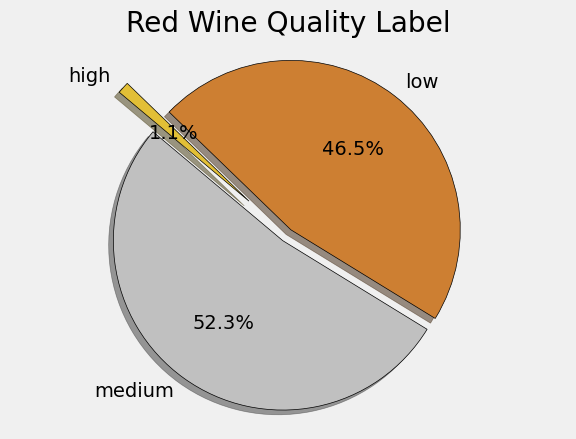

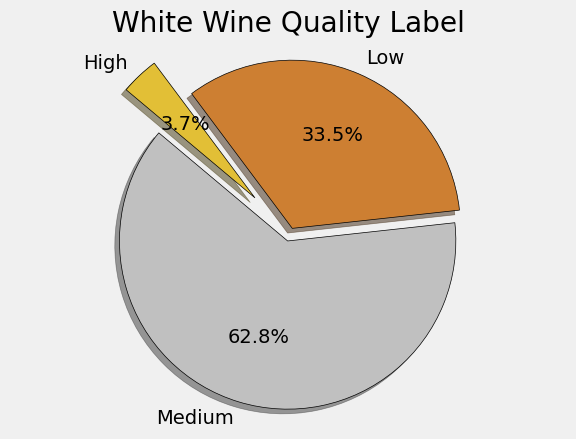

In [ ]:
#Create a Pie chart comparing the quality of the 2 wines
#Red Wine
labels = rw.value_counts('quality_label').keys()
sizes = rw.value_counts('quality_label')
colors = ['#C0C0C0', '#cd7f32', '#e2bf36']
explode = (0.04, 0.04, 0.3) 

plt.pie(sizes, 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, 
        colors=colors,
        startangle=140,
        wedgeprops={'edgecolor': 'black'})
plt.title('Red Wine Quality Label')
plt.axis('equal')
plt.show()

#White wine
labels = ww.value_counts('quality_label').keys()
sizes = ww.value_counts('quality_label')
explode = (0.04, 0.04, 0.3) 

plt.pie(sizes, 
        explode= explode, 
        labels= labels, 
        autopct= '%1.1f%%',
        shadow= True, 
        colors=colors,
        startangle= 140,
        wedgeprops= {'edgecolor': 'black'})
plt.title('White Wine Quality Label')
plt.axis('equal')
plt.show()

#Gold = #e2bf36
#Silver = #C0C0C0
#Bronze = #cd7f32

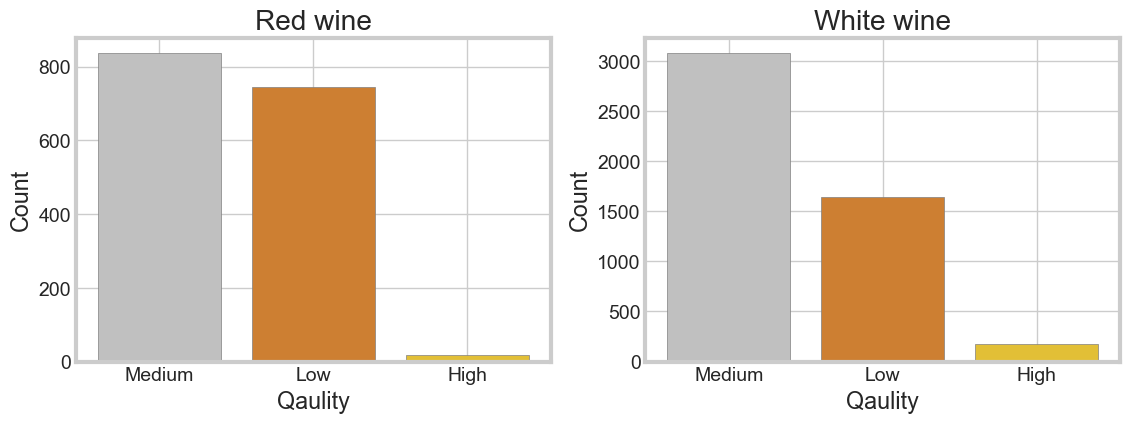

In [730]:
# Create a bar chart comparing the quality of the 2 wines
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Red Wine
x = rw.value_counts('quality_label').keys()
y = rw.value_counts('quality_label').to_list()
colors = ['#C0C0C0', '#cd7f32', '#e2bf36']

axs[0].bar(x, y, 
        color=colors, 
        edgecolor='grey')
axs[0].set_title('Red wine')
axs[0].set_xlabel('Qaulity')
axs[0].set_ylabel('Count')


# White wine
x = ww.value_counts('quality_label').keys()
y = ww.value_counts('quality_label').to_list()
colors = ['#C0C0C0', '#cd7f32', '#e2bf36']

axs[1].bar(x, y, 
        color=colors, 
        edgecolor='grey')
axs[1].set_title('White wine')
axs[1].set_xlabel('Qaulity')
axs[1].set_ylabel('Count')

plt.show()

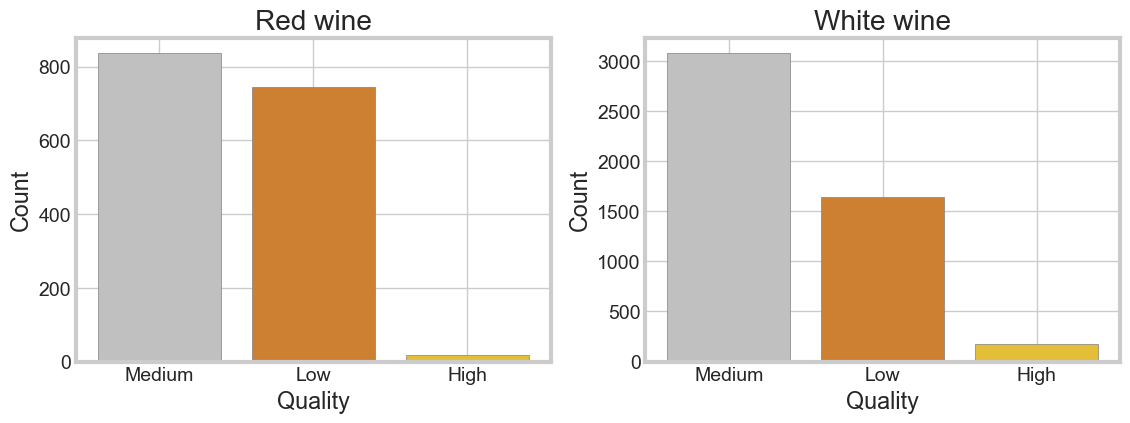

In [739]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Red wine
x = rw.value_counts('quality_label').keys()
y = rw.value_counts('quality_label').to_list()
colors = ['#C0C0C0', '#cd7f32', '#e2bf36']

axs[0].bar(x, y, 
            color=colors,
            edgecolor='grey')
axs[0].set_title('Red wine')
axs[0].set_xlabel('Quality')
axs[0].set_ylabel('Count')

# White wine
x = ww.value_counts('quality_label').keys()
y = ww.value_counts('quality_label').to_list()
colors = ['#C0C0C0', '#cd7f32', '#e2bf36']

axs[1].bar(x, y, 
            color=colors, 
            edgecolor='grey')
axs[1].set_title('White wine')
axs[1].set_xlabel('Quality')
axs[1].set_ylabel('Count')

plt.show()

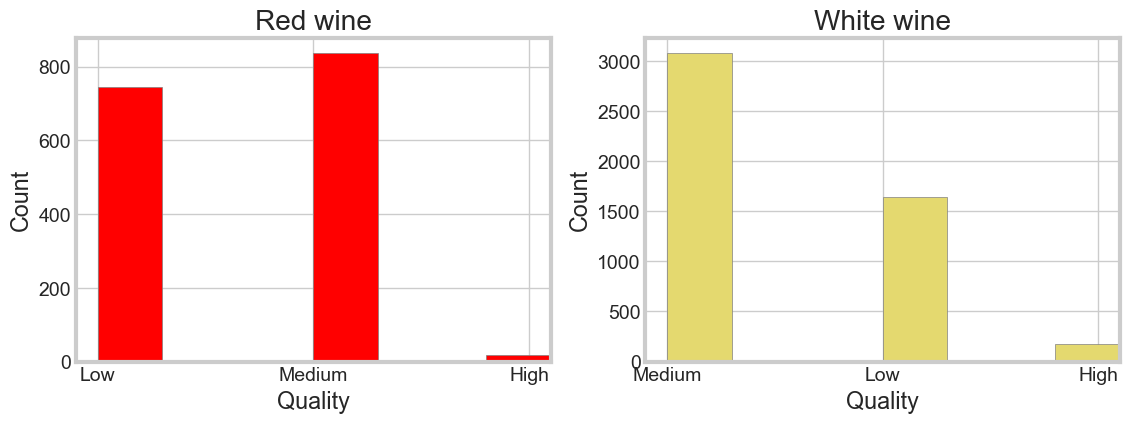

In [786]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))


axs[0].set_title('Red wine')
axs[0].set_xlabel('Quality')
axs[0].set_ylabel('Count')
axs[0].hist(rw['quality_label'], 
            color='red',
            edgecolor='grey',
            width=0.3)

axs[1].set_title('White wine')
axs[1].set_xlabel('Quality')
axs[1].set_ylabel('Count')
axs[1].hist(ww['quality_label'], 
            color='#E4d96f',
            edgecolor='grey',
            width=0.3)

plt.show()

<AxesSubplot:xlabel='ph', ylabel='quality_label'>

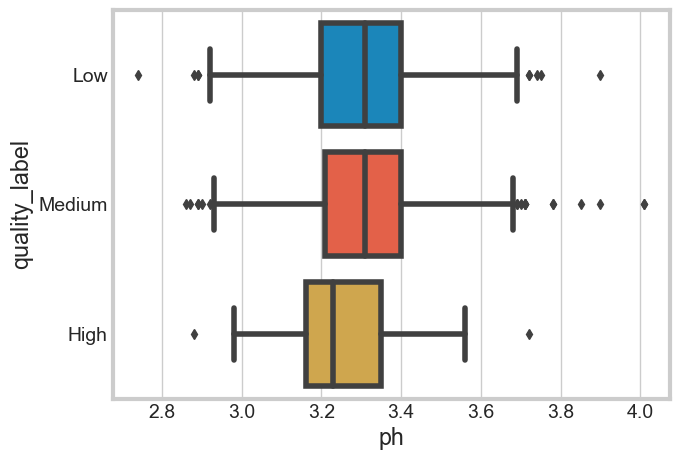

In [788]:
sns.boxplot(x = 'ph', y ='quality_label', data = rw)

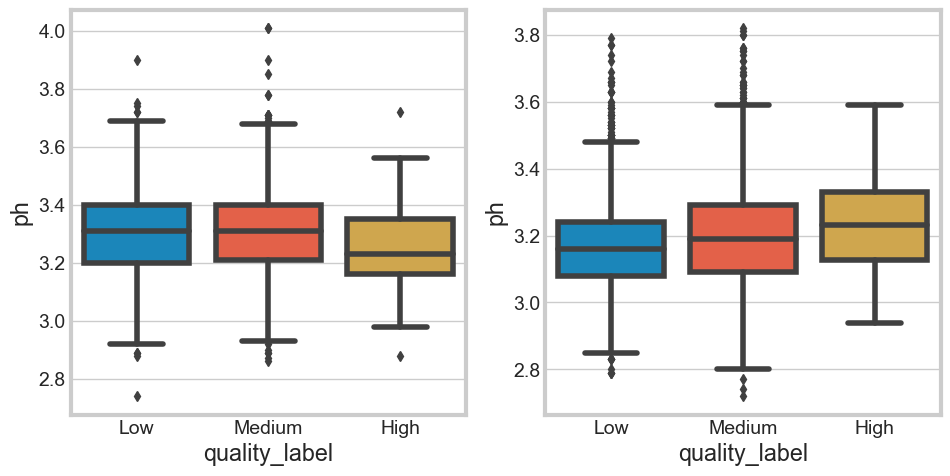

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

axs[0].set_title("Red Wine")
axs[1].set_title("White Wine")

sns.boxplot(y='ph', x='quality_label', data=rw, ax=axes[0])
sns.boxplot(y='ph', x='quality_label', data=ww, ax=axes[1])

plt.show()

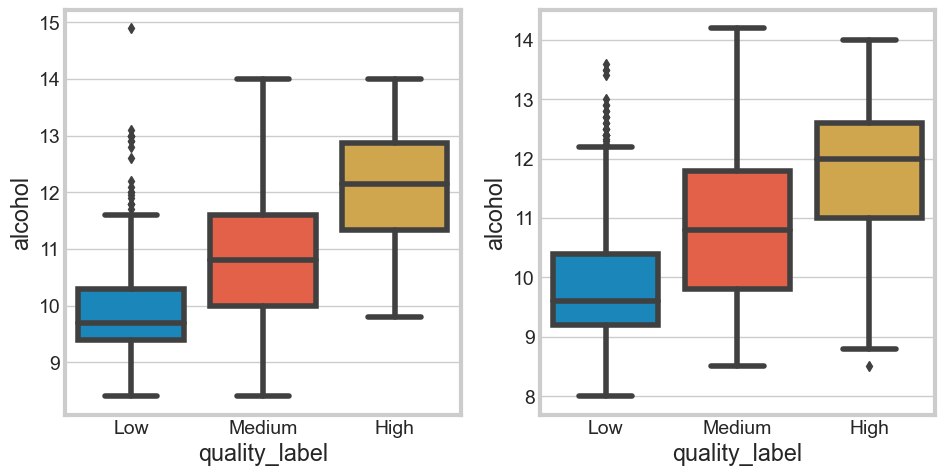

In [803]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

sns.boxplot(y='alcohol', x='quality_label', data=rw, ax=axes[0])
sns.boxplot(y='alcohol', x='quality_label', data=ww, ax=axes[1])

plt.show()

<AxesSubplot:xlabel='quality_label', ylabel='density'>

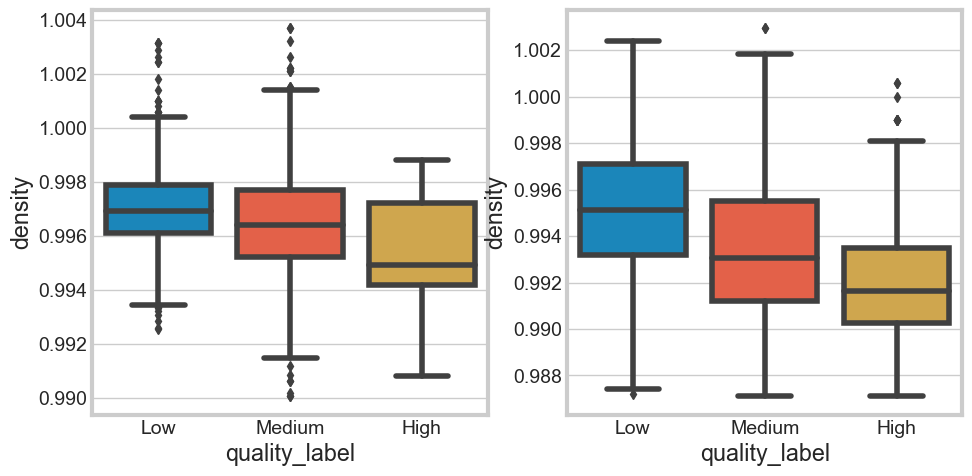

In [802]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

sns.boxplot(y='density', x='quality_label', data=rw_density_no_outliers, ax=axes[0])
sns.boxplot(y='density', x='quality_label', data=ww_density_no_outliers, ax=axes[1])

<AxesSubplot:title={'center':'White Wine'}, xlabel='quality', ylabel='ph'>

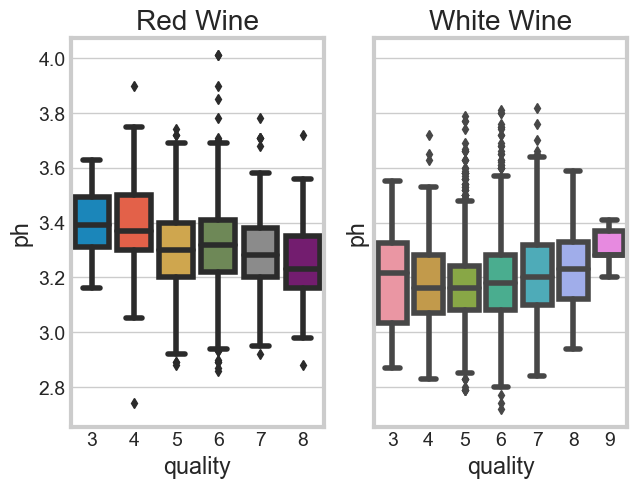

In [764]:
fig, axs = plt.subplots(1, 2, sharey="row")

axs[0].set_title("Red Wine")
axs[1].set_title("White Wine")

sns.boxplot(y= 'ph', x = 'quality', data=rw, ax=axs[0])
sns.boxplot(y= 'ph', x = 'quality', data=ww, ax=axs[1])

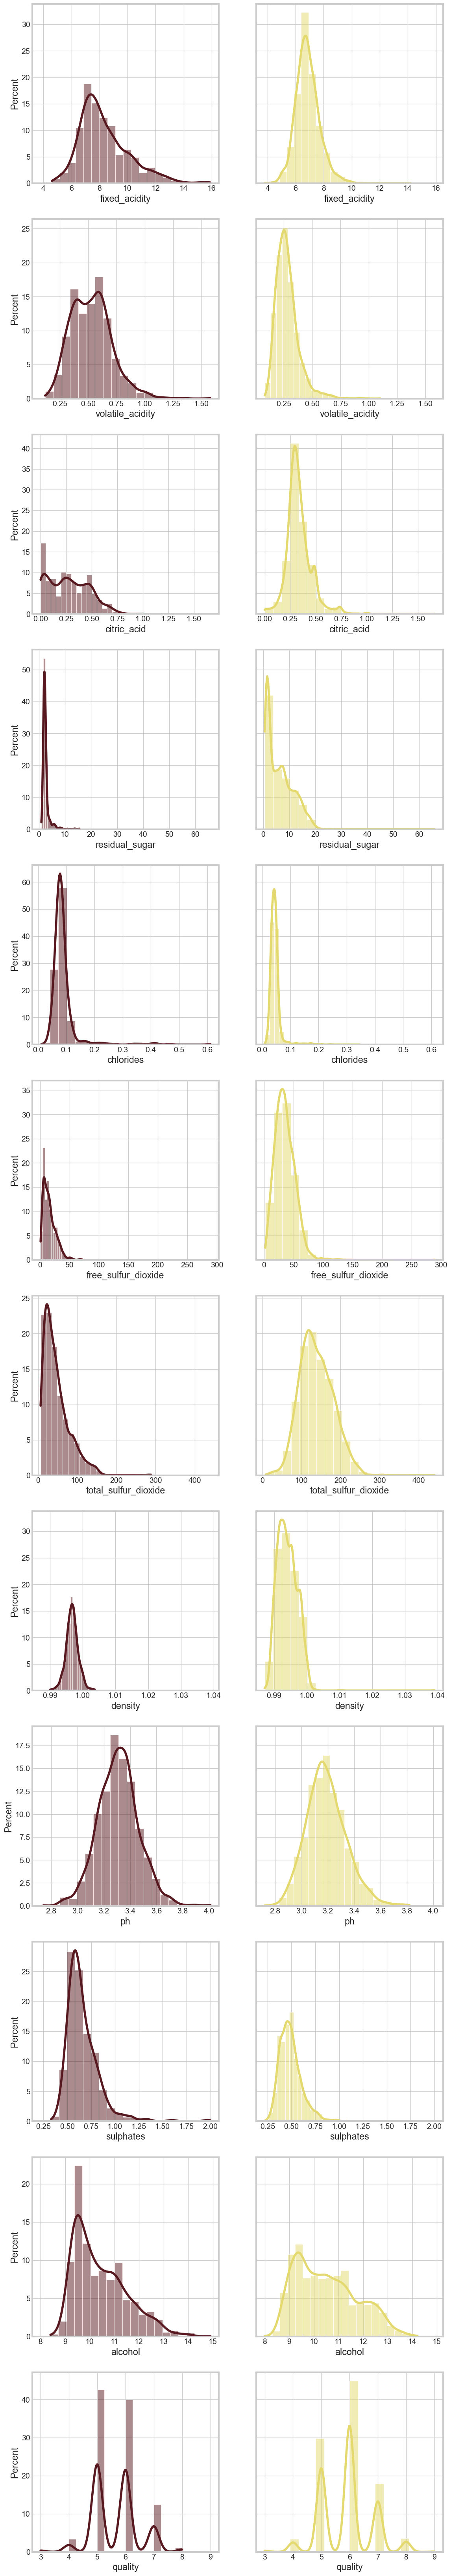

In [ ]:
# Comparing the wines with outliers
fields=list(rw)

fields.remove("wine_type")
fields.remove("quality_label")

fig, axes = plt.subplots(len(fields), 2, sharex="row", sharey="row", tight_layout=False, figsize = (len(fields), 2*40))
h=0
for field in fields:
     sns.histplot(ax = axes[h][0], x = rw[field],
               bins = 20,
               kde = True,
               cbar = True,
               stat = 'percent',
               color ="#58181F")
     sns.histplot(ax = axes[h][1], x = ww[field],
               bins = 20,
               kde = True,
               cbar = True,
               stat= 'percent',
               color="#E4d96f")
     h+=1


In [ ]:
round(rw.corr(), 2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
fixed_acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile_acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric_acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual_sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free_sulfur_dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total_sulfur_dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
ph,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


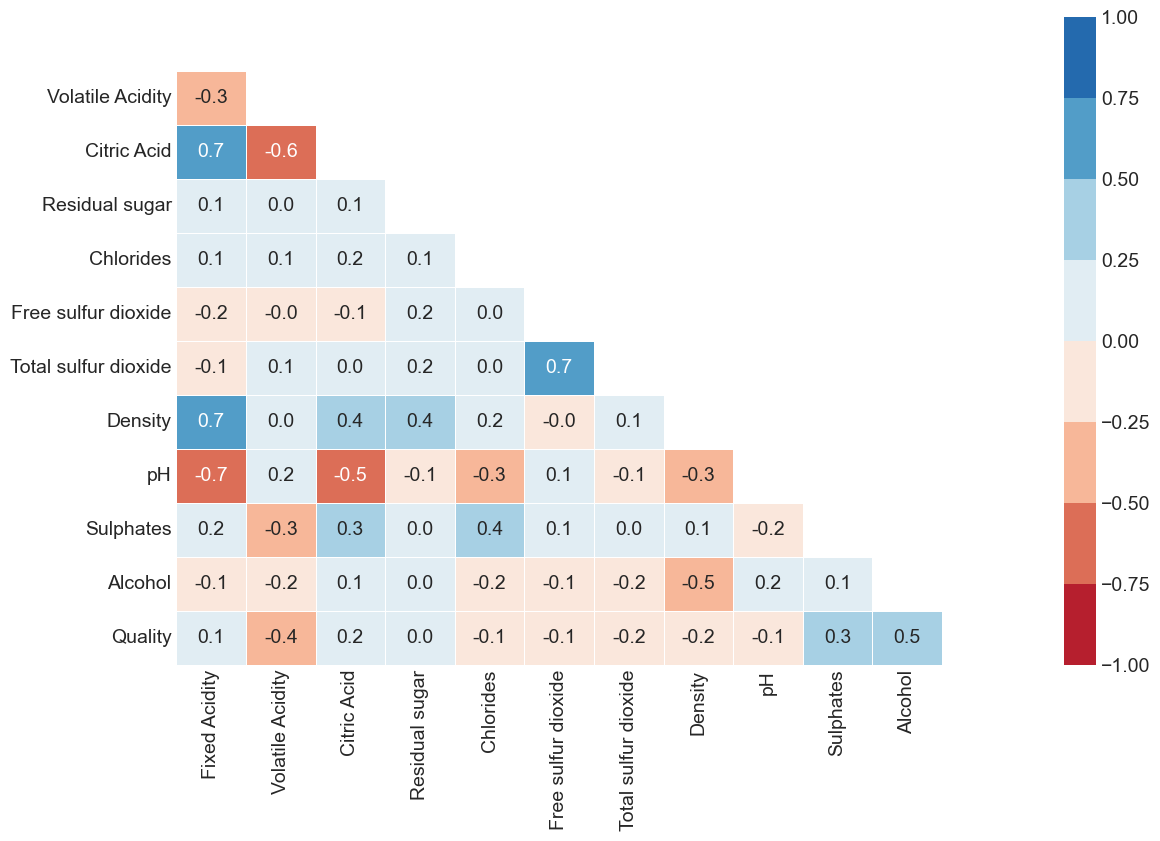

In [ ]:
# Creating a Heatmap
#giving the shape 
plt.figure(figsize=(12,8))

#giving the data 
corr = rw.corr()

#giving the color
colormap = sns.color_palette("RdBu", 8)

#giving new list 
xcatagories= ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual sugar', 'Chlorides', 'Free sulfur dioxide', 'Total sulfur dioxide','Density', 'pH', 'Sulphates', 'Alcohol', '']
ycatagories= [' ', 'Volatile Acidity', 'Citric Acid', 'Residual sugar', 'Chlorides', 'Free sulfur dioxide', 'Total sulfur dioxide','Density', 'pH', 'Sulphates', 'Alcohol', 'Quality']

#creating the mask to remove the top triangle
mask = np.triu(corr)

sns.heatmap(corr, 
            annot=True, 
            cmap=colormap, 
            vmin= -1, vmax= 1, 
            fmt= '.1f', 
            xticklabels= xcatagories, yticklabels= ycatagories,
            mask=mask,
            linewidths= 0.5,
            linecolor= 'white')

plt.show()

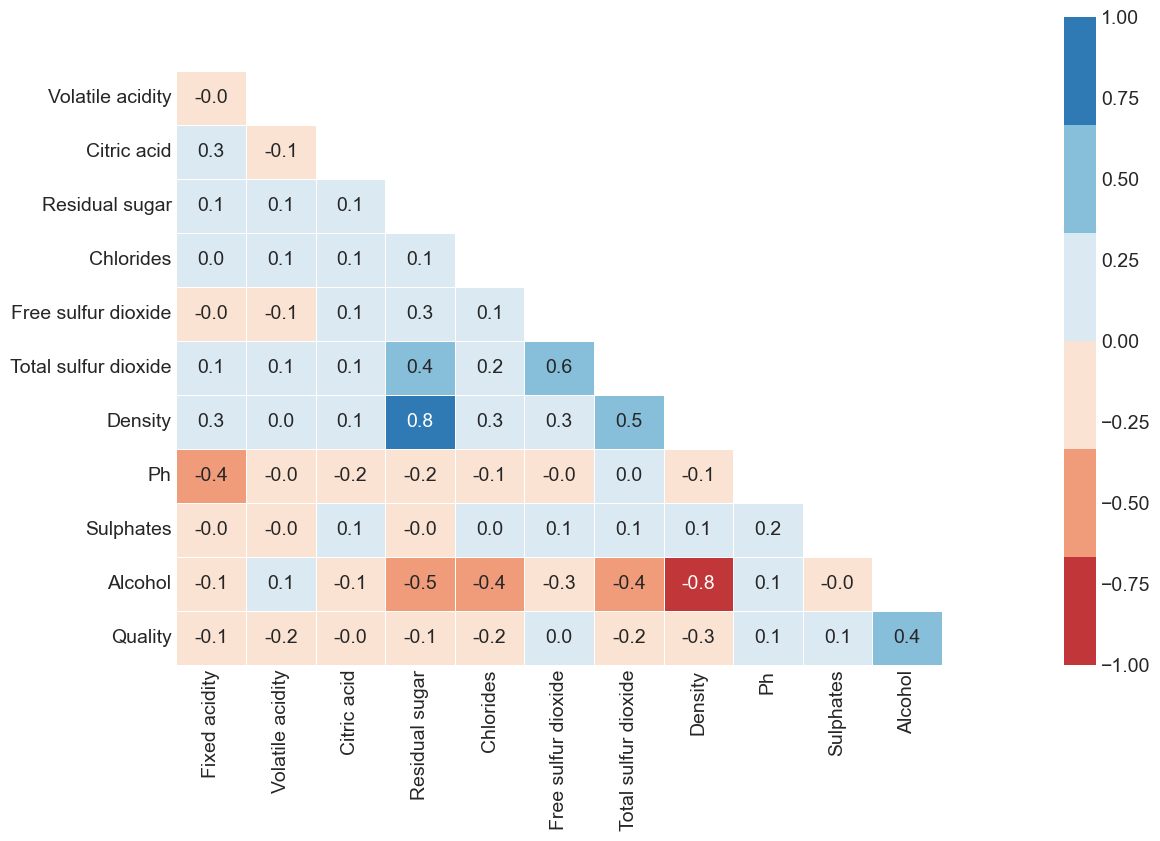

In [789]:
# Creating a Heatmap (improved)
#giving the shape 
plt.figure(figsize=(12,8))

#giving the data 
corr = ww.corr()

#giving the color
colormap = sns.color_palette("RdBu", 6)

#giving new list 
xcat = list(org.values())
ycat = list(org.values())
ycat[0]=''
xcat[-1]= ''

#creating the mask to remove the top triangle
mask = np.triu(corr)

#creating the chart
sns.heatmap(corr, 
            annot=True, 
            cmap=colormap, 
            vmin= -1, vmax= 1, 
            fmt= '.1f',
            xticklabels= xcat, yticklabels= ycat,
            mask=mask,
            linewidths= 0.5,
            linecolor= 'white')

plt.show()

In [659]:
q75, q25 = np.percentile(ww['density'], [75, 25])
iqr = q75 - q25

cutoff = iqr * 3

lower = q25 - cutoff
upper = q75 + cutoff

outliers = ww[(ww['density'] < lower) | (ww['density'] > upper)]
print(outliers.size)

ww_density_no_outliers = ww[(ww['density'] >= lower) & (ww['density'] <= upper)]

42


In [774]:
ww_density_no_outliers

,fixed_acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,Medium,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,Medium,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,Medium,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Medium,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Medium,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,Medium,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,Low,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,Medium,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,Medium,white


<AxesSubplot:xlabel='density', ylabel='Count'>

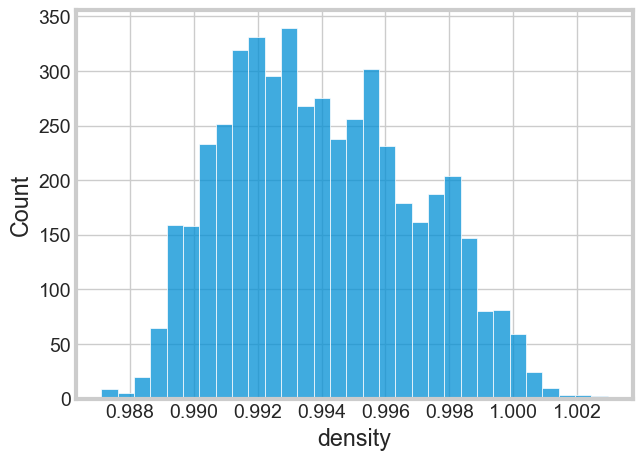

In [723]:
sns.histplot(data=ww_density_no_outliers, x="density")

<AxesSubplot:xlabel='density', ylabel='Count'>

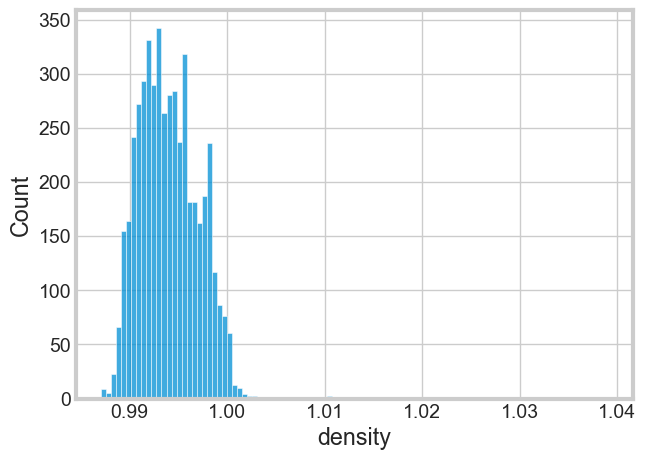

In [650]:
sns.histplot(data=ww, x="density")

In [769]:
ww.nlargest(5, "density")
#ww.nsmallest(5, "density")

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_label,wine_type
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,Medium,white
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,Medium,white
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,Medium,white
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6,Medium,white
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6,Medium,white


In [770]:
ww.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [780]:
# Define a list of columns to remove outliers from
org_list = org.items()

#manaul input
#cols_to_remove_outliers = ["alcohol", "volatile acidity", "citric acid"]

#automatic input
cols_to_remove_outliers = [col for col, name in org_list]

# Loop through the columns and remove outliers using IQR method
rw_no_outliers = rw.copy()
for col in cols_to_remove_outliers:
    q1 = rw[col].quantile(0.05)
    q3 = rw[col].quantile(0.95)
    iqr = q3 - q1
    rw_no_outliers = rw_no_outliers[(rw_no_outliers[col] >= q1) & (rw_no_outliers[col] <= q3 + 5*iqr)]


#White Wine
ww_no_outliers = ww.copy()
for col in cols_to_remove_outliers:
    q1 = ww[col].quantile(0.05)
    q3 = ww[col].quantile(0.95)
    iqr = q3 - q1
    ww_no_outliers = ww_no_outliers[(ww_no_outliers[col] >= q1) & (ww_no_outliers[col] <= q3 + 5*iqr)]


In [781]:
np.shape(ww_no_outliers)


(3136, 14)

In [782]:
np.shape(ww)

(4898, 14)

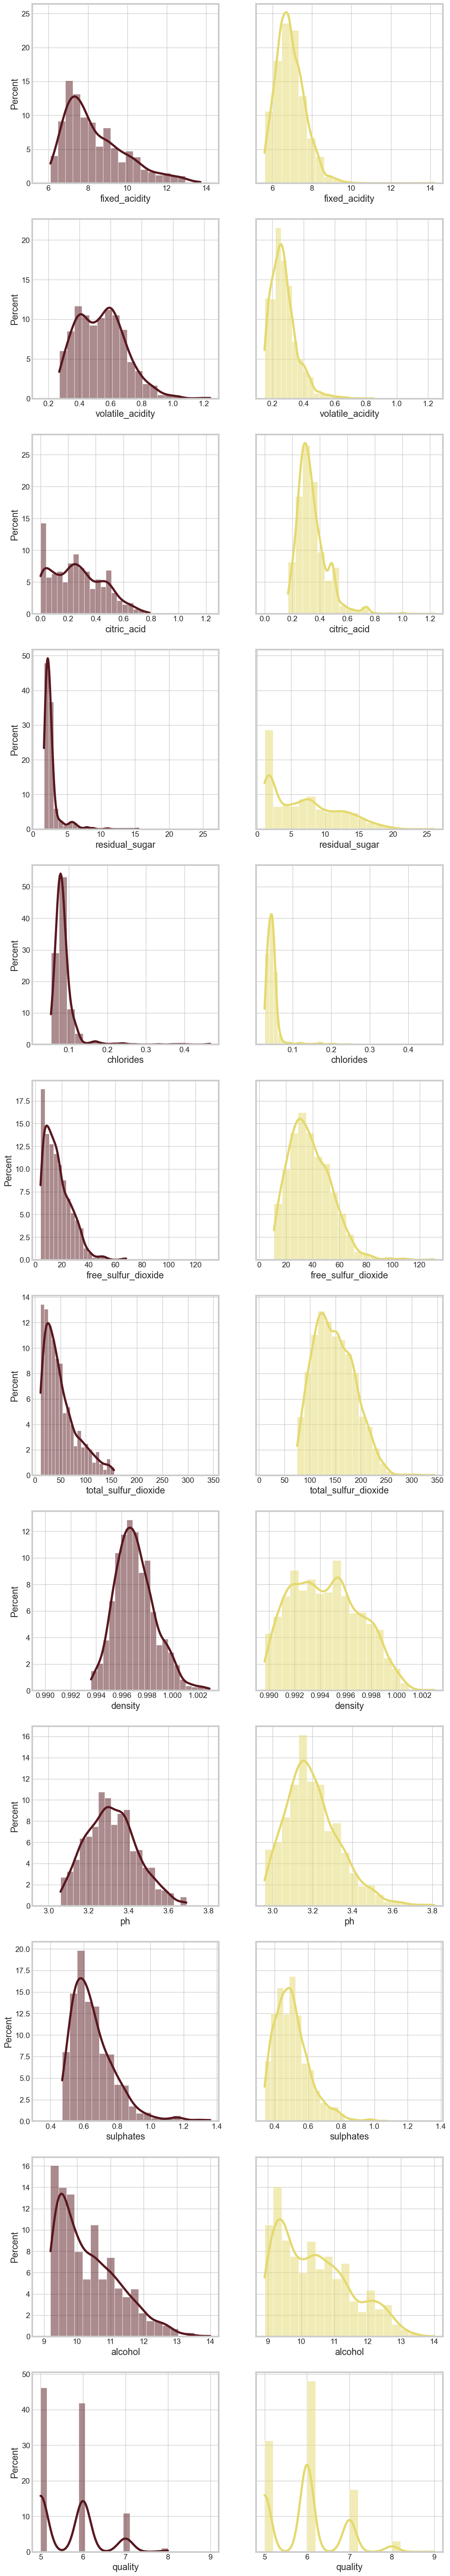

In [783]:
# Comparing the wines without top 5% outliers
fields=list(ww_no_outliers)

fields.remove("wine_type")
fields.remove("quality_label")

fig, axes = plt.subplots(len(fields), 2, sharex="row", sharey="row", tight_layout=False, figsize = (len(fields), 2*40))
h=0
for field in fields:
     sns.histplot(ax = axes[h][0], x = rw_no_outliers[field],
               bins = 20,
               kde = True,
               cbar = True,
               stat = 'percent',
               color ="#58181F")
     sns.histplot(ax = axes[h][1], x = ww_no_outliers[field],
               bins = 20,
               kde = True,
               cbar = True,
               stat= 'percent',
               color="#E4d96f")
     h+=1

In [722]:
np.shape(rw_no_outliers)

(1063, 14)